In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


#基本的なコード
#フォントサイズの変更
plt.rcParams["font.size"] = 28
plt.rcParams['font.family'] = "IPAexGothic"

Duplicate key in file PosixPath('/Users/k22120kk/.pyenv/versions/3.10.5/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'), line 262 ('font.family:  sans-serif')


In [2]:
# csvの読み込み
# ヘッダなしの場合csv = pd.read_csv("ファイル名(.csv)", header=None, names=['user_id', 'name'])で可能
fname = "../../data/焼きそば2/"
acc = pd.read_csv(fname+"HartRate.csv",encoding = 'utf-8')
ans = pd.read_csv(fname+"ans.csv",encoding = 'utf-8')

センシング開始
0.0 21.0
カルピスを注ぐ
21.0 41.0
コップで飲む
41.0 55.0
トングを掴む
55.0 64.0
食材を掴む
64.0 72.0
食材を置く
72.0 94.0
食材を戻す
94.0 101.0
食材をかき混ぜる
101.0 246.0
食材を掴む
246.0 268.0
食材をかき混ぜる
268.0 278.0
食材を掴む
278.0 297.0
食材をかき混ぜる
297.0 470.0
休憩
470.0 486.0
食材をかき混ぜる
486.0 492.0
休憩
492.0 504.0
食材をかき混ぜる
504.0 514.0
休憩
514.0 520.0
食材をかき混ぜる
520.0 536.0
休憩
536.0 564.0
焚き火の調整
564.0 639.0
食材をかき混ぜる
639.0 659.0
休憩
659.0 688.0
焚き火の調整
688.0 776.0
食材をかき混ぜる
776.0 804.0
休憩
804.0 827.0
食材をかき混ぜる
827.0 841.0
焚き火の調整
841.0 895.0
休憩
895.0 906.0
焚き火の調整
906.0 933.0
食材をかき混ぜる
933.0 962.0
焚き火の調整
962.0 990.0
コップで飲む
990.0 994.0
休憩
994.0 1011.0
焚き火の調整
1011.0 1029.0
休憩
1029.0 1068.0
食材をかき混ぜる
1068.0 1123.0
休憩
1123.0 1167.0
ソースをかける
1167.0 1184.0
食材をかき混ぜる
1184.0 1195.0
焚き火の調整
1195.0 1221.0
休憩
1221.0 1230.0
ソースをかける
1230.0 1235.0
食材をかき混ぜる
1235.0 1282.0
休憩
1282.0 1300.0
取り分ける
1300.0 1390.0
鉄板をひっくり返す
1390.0 1483.0
食べる
1483.0 1566.0
鉄板を抑える
1566.0 1591.0
肉を置く
1591.0 1622.0
食べる
1622.0 1750.0
センシングストップ
1750.0 1749.195


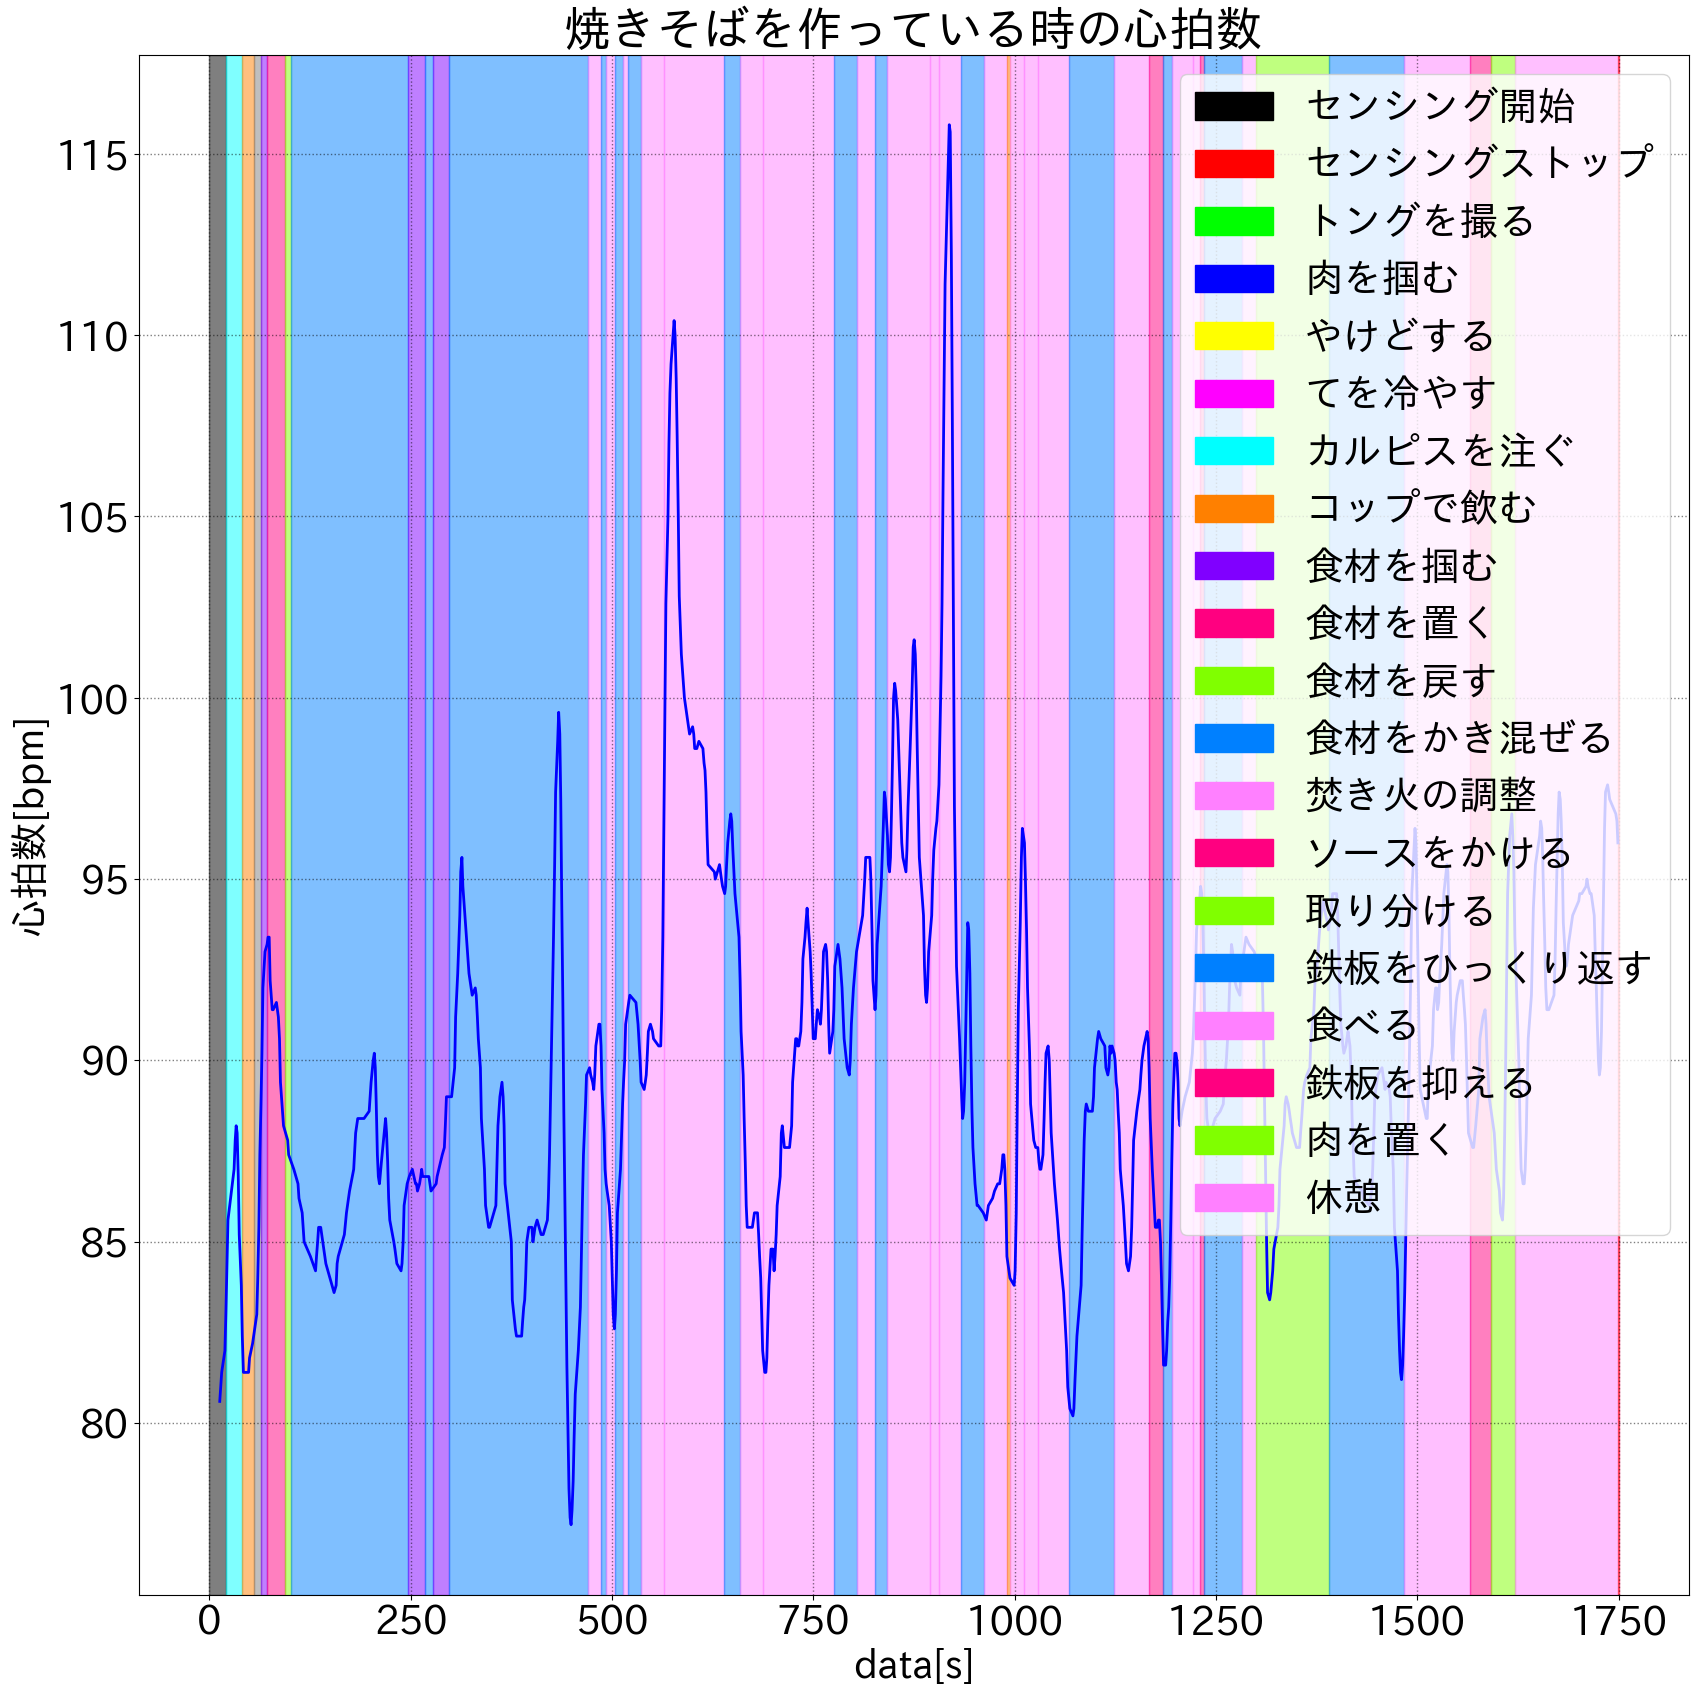

In [3]:
fig = plt.figure(figsize=(20, 20))
## 一つの画像内に複数のグラフを表示させる場合に使用
ax3 = fig.add_subplot(1, 1, 1)
## グリッドの設定
ax3.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
## グラフのタイトル
ax3.set_title("焼きそばを作っている時の心拍数")
## x軸のラベル
ax3.set_xlabel('data[s]')
## y軸のラベル
ax3.set_ylabel('心拍数[bpm]')
## y軸の値をオフセットなしで表示
ax3.get_yaxis().get_major_formatter().set_useOffset(False)
## グラフの描画
## ax1.plot(x軸データ,y軸データ,label="ラベル名")
## x軸を最初のデータからの相対時間で表示させています

# データの操作
## ノイズ除去
ax3.plot(
    (acc["time"] - acc["time"][0]) / 1000,
    acc["bpm"].rolling(window=5).mean(),
    label="rssi",
    linewidth=2,  # 線の太さを指定
    color="blue"  # 線の色を赤色に指定
)

ax3.legend()

# 各contentに対応する色の辞書を作成
content_colors = {
    "センシング開始": "#000000",
    "センシングストップ": "#ff0000",
    "トングを撮る": "#00ff00",
    "肉を掴む": "#0000ff",
    "やけどする": "#ffff00",
    "てを冷やす": "#ff00ff",
    "カルピスを注ぐ": "#00ffff",
    "コップで飲む": "#ff8000",
    "食材を掴む": "#8000ff",
    "食材を置く": "#ff0080",
    "食材を戻す": "#80ff00",
    "食材をかき混ぜる": "#0080ff",
    "焚き火の調整": "#ff80ff",
    "ソースをかける": "#ff0080",
    "取り分ける": "#80ff00",
    "鉄板をひっくり返す": "#0080ff",
    "食べる": "#ff80ff",
    "鉄板を抑える": "#ff0080",
    "肉を置く": "#80ff00",
    "休憩": "#ff80ff",
}

# 階段利用区間をラベリング
for i in range(len(ans)):
    content = ans["content"][i]  # 現在のデータのcontent
    print(content)
    color = content_colors.get(content, "#808080")  # 現在のデータのcontentに対応する色
    start_time = (ans["time"][i] - ans["time"][0]) / 1000
    end_time = 0
    if i < len(ans) - 1 :
        end_time = (ans["time"][i + 1] - ans["time"][0]) / 1000
    else :
        end_time = (acc["time"].iloc[-1] - acc["time"][0]) / 1000

    start_time = start_time
    end_time = end_time

    print(start_time, end_time)
    ax3.axvspan(start_time, end_time, color=color, alpha=0.5, zorder=1)

# 凡例の作成
content_labels = list(content_colors.keys())
content_patches = [matplotlib.patches.Patch(color=color) for color in content_colors.values()]

# 凡例の表示
ax3.legend(content_patches, content_labels, loc="upper right")

plt.show()